**Part 1: Data Cleaning**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [ ]:
property_hk = pd.read_csv("HKProp_Datasetuse.csv")
property_hk.dtypes

,0
Reg_Date,object
Reg_Year,int64
Prop_Name_ENG,object
ADDRESS_ENG,object
Prop_Type,object
Estate_Size,int64
Tower,object
Floor,int64
Flat,object
Bed_Room,float64


In [ ]:
property_hk_cleaned = property_hk.replace('--', '0').replace('$', '')

In [ ]:
Reg_Date = pd.to_datetime(np.array(property_hk_cleaned['Reg_Date']))
Days_to_reg_date = [int(t.days) for t in (Reg_Date - datetime.datetime.today())]

<ipython-input-7-ed07e4bc6474>:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  Reg_Date = pd.to_datetime(np.array(property_hk_cleaned['Reg_Date']))


In [ ]:
Bedroom = property_hk_cleaned['Bed_Room'].replace('Studio', '0').fillna(0)
Is_studio = [1 if e == 0 else 0 for e in np.array(property_hk_cleaned['Bed_Room'])]

In [ ]:
SaleableArea = [int(str(t).replace(',', '').replace('nan', '0')) for t in property_hk_cleaned['SaleableArea']]
SaleableAreaPrice = [int(str(t).replace(',', '').replace('$', '0').replace('nan', '0')) for t in property_hk_cleaned['SaleableAreaPrice']]
GrossArea = [int(str(t).replace(',', '').replace('nan', '0')) for t in property_hk_cleaned['Gross Area']]
GrossAreaPrice = [int(str(t).replace(',', '').replace('$', '0').replace('nan', '0')) for t in property_hk_cleaned['Gross Area_Price']]

# Convert SaleableAreaPrice to float
property_hk_cleaned['SaleableAreaPrice'] = (
    property_hk_cleaned['SaleableAreaPrice']
    .astype(str)
    .str.replace(',', '')
    .str.replace('$', '')
    .replace('nan', '0')
    .astype(float)
)

# Convert GrossAreaPrice to float (same process)
property_hk_cleaned['GrossAreaPrice'] = (
    property_hk_cleaned['Gross Area_Price']
    .astype(str)
    .str.replace(',', '')
    .str.replace('$', '')
    .replace('nan', '0')
    .astype(float)
)

# Verify conversion
print(property_hk_cleaned[['SaleableAreaPrice', 'GrossAreaPrice']].head())
print(f"\nData types:\n{property_hk_cleaned[['SaleableAreaPrice', 'GrossAreaPrice']].dtypes}")

   SaleableAreaPrice  GrossAreaPrice
0            14763.0             0.0
1            16156.0         10307.0
2            17868.0         11398.0
3                0.0             0.0
4            19459.0             0.0

Data types:
SaleableAreaPrice    float64
GrossAreaPrice       float64
dtype: object


In [ ]:
property_hk_cleaned['Prop_Type'] = property_hk_cleaned['Prop_Type'].str.lower()

In [ ]:
property_hk_cleaned

,Reg_Date,Reg_Year,Prop_Name_ENG,ADDRESS_ENG,Prop_Type,Estate_Size,Tower,Floor,Flat,Bed_Room,...,Primary_Schools,Secondary_Schools,Parks,Library,Bus_Route,Mall,Wet Market,Latitude,Longitude,GrossAreaPrice
0,26/10/2016,2016,18 SHELLEY STREET,18 SHELLEY STREET,single,1,NaN,3,18,NaN,...,2,1,6,0,52,0,0,22.281442,114.152991,0.0
1,16/11/2017,2017,Lilian Court,6-8 SHELLEY STREET,single,1,NaN,19,A,2.0,...,2,0,4,0,29,0,0,22.281865,114.153329,10307.0
2,11/10/2016,2016,Lilian Court,6-8 SHELLEY STREET,single,1,NaN,6,B,2.0,...,2,0,4,0,29,0,0,22.281865,114.153329,11398.0
3,18/10/2017,2017,Felicity Building,9-13 SHELLEY STREET,single,1,NaN,20,E,NaN,...,1,1,9,0,31,0,0,22.281688,114.152795,0.0
4,18/10/2017,2017,9-13 SHELLEY STREET,9-13 SHELLEY STREET,single,1,NaN,2,A,NaN,...,0,1,7,0,45,0,0,22.281688,114.152795,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1134,8/8/2017,2017,Caine Tower,55 ABERDEEN STREET,single,1,NaN,10,A,3.0,...,2,1,5,0,27,0,0,22.282588,114.151297,12273.0
1135,28/4/2017,2017,Caine Tower,55 ABERDEEN STREET,single,1,NaN,8,A,3.0,...,2,1,5,0,27,0,0,22.282588,114.151297,12467.0
1136,22/3/2017,2017,Caine Tower,55 ABERDEEN STREET,single,1,NaN,8,B,2.0,...,2,1,5,0,27,0,0,22.282588,114.151297,11706.0
1137,15/2/2017,2017,Caine Tower,55 ABERDEEN STREET,single,1,NaN,2,C,2.0,...,2,1,5,0,27,0,0,22.282588,114.151297,11405.0


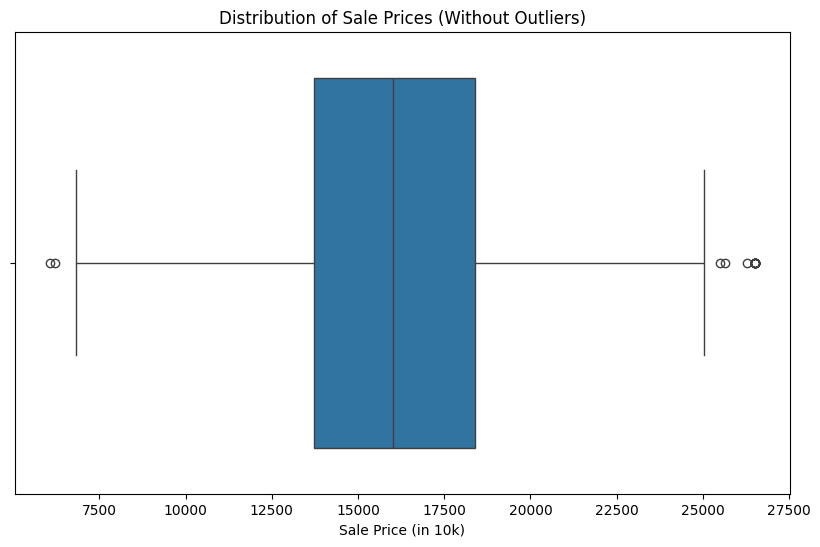

In [ ]:
property_copy = property_hk_cleaned.copy()

Q1 = property_copy['SaleableAreaPrice'].quantile(0.25)
Q3 = property_copy['SaleableAreaPrice'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers
df_no_outliers = property_copy[(property_copy['SaleableAreaPrice'] >= lower_bound) & (property_copy['SaleableAreaPrice'] <= upper_bound)]

# Create the box plot without outliers
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x=df_no_outliers['SaleableAreaPrice'])
plt.title('Distribution of Sale Prices (Without Outliers)')
plt.xlabel('Sale Price (in 10k)')
plt.show()

**Part 2: Visualization**

In [ ]:
X = np.concatenate([np.array(Days_to_reg_date).reshape(-1, 1), np.array(Bedroom).reshape(-1, 1),
                        np.array(Is_studio).reshape(-1, 1), np.array(SaleableArea).reshape(-1, 1),
                        np.array(GrossAreaPrice).reshape(-1, 1),
                        np.array(GrossArea).reshape(-1, 1),
                        np.array(SaleableAreaPrice).reshape(-1, 1),
                        np.array(pd.get_dummies(property_hk_cleaned[['Prop_Type', 'Roof']])),
                        np.array(property_hk_cleaned[['Floor', 'Build_Ages', 'Kindergarten', 'Primary_Schools', 'Secondary_Schools',
                                                      'Parks', 'Library', 'Bus_Route', 'Mall', 'Wet Market', 'Latitude', 'Longitude']].fillna(0))], axis=1)

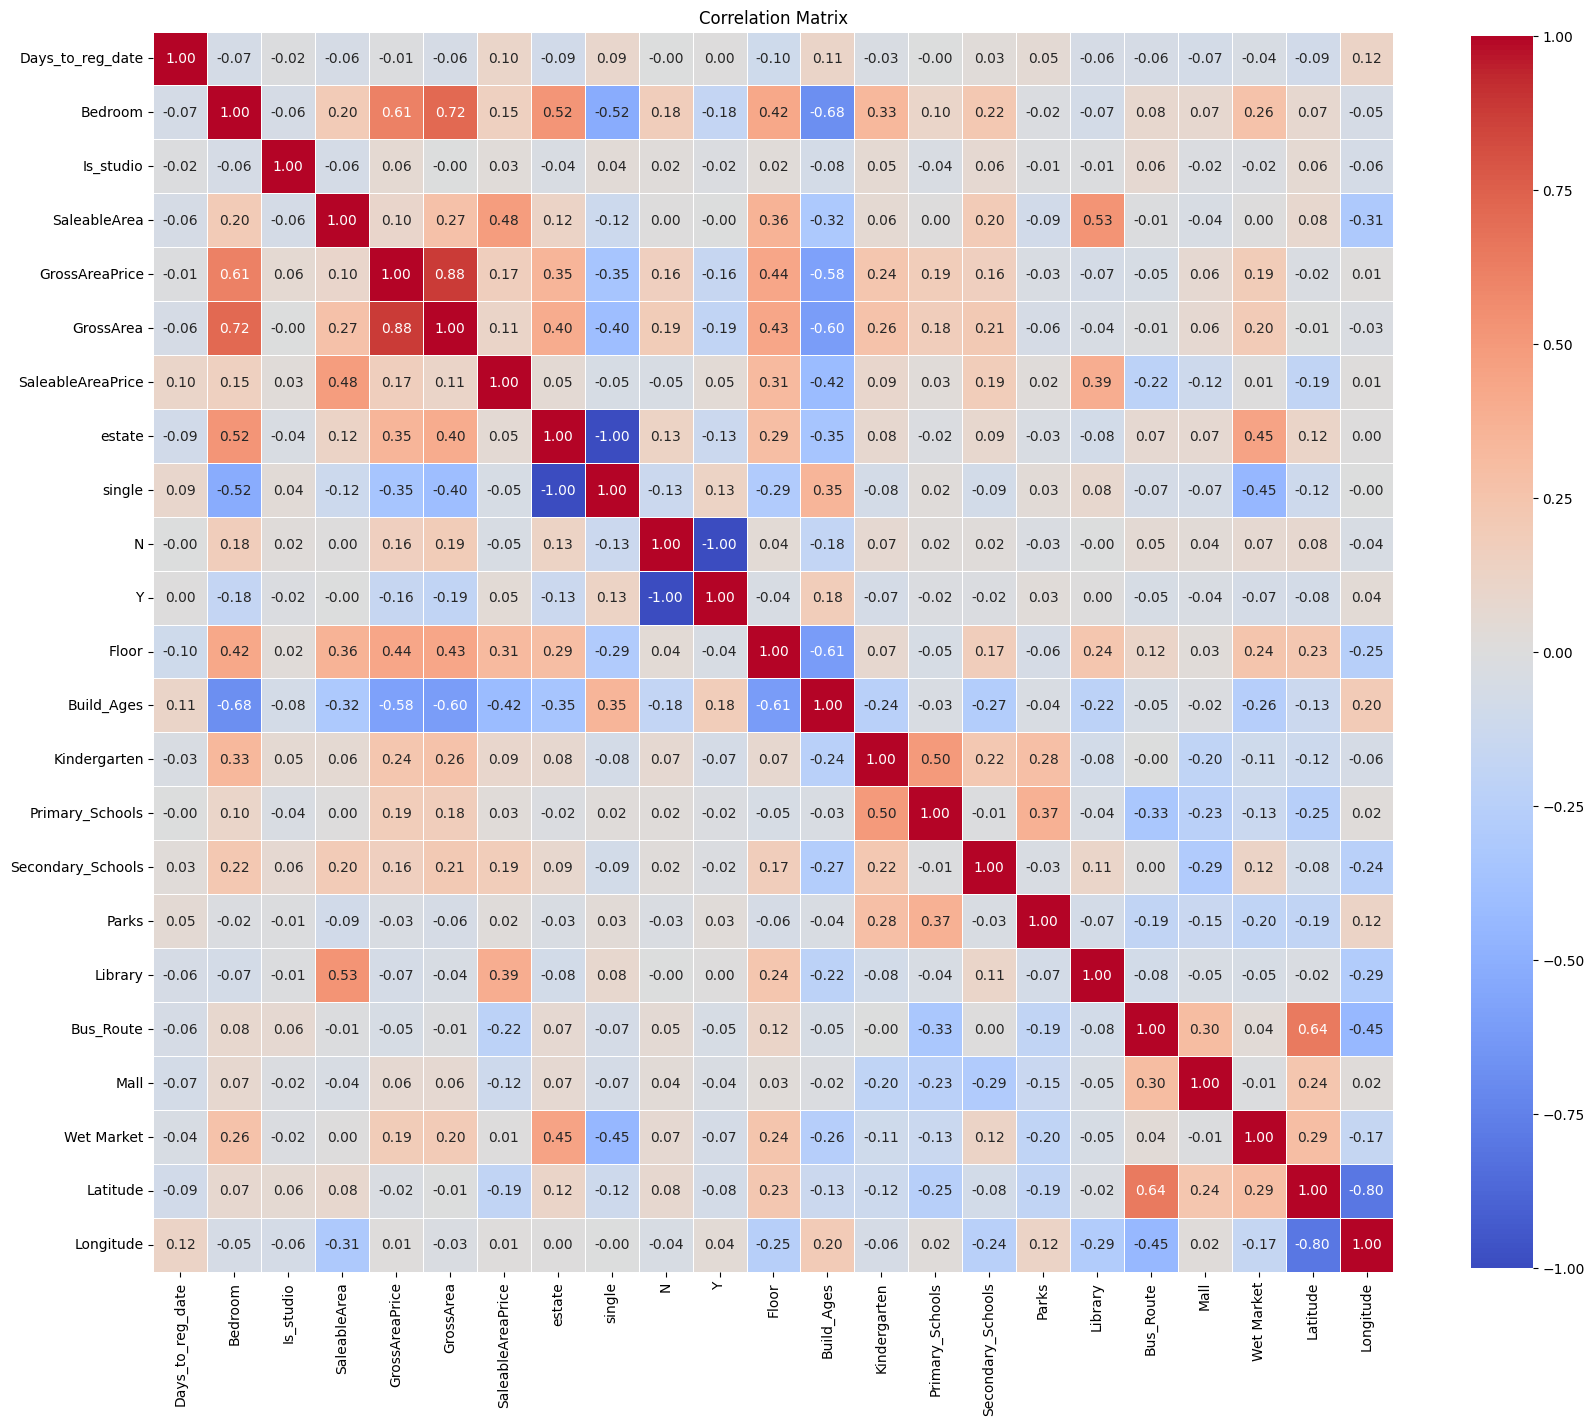

In [ ]:
columns = ['Days_to_reg_date', 'Bedroom', 'Is_studio', 'SaleableArea', 'GrossAreaPrice',
          'GrossArea', 'SaleableAreaPrice', 'estate', 'single', 'N', 'Y',
          'Floor', 'Build_Ages', 'Kindergarten', 'Primary_Schools',
          'Secondary_Schools', 'Parks', 'Library', 'Bus_Route',
          'Mall', 'Wet Market', 'Latitude', 'Longitude']

df = pd.DataFrame(X, columns=columns)

correlation_matrix = df.corr()

plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8}, linewidths=0.5)

plt.title('Correlation Matrix')
plt.show()

**Part 3: Machine Learning**

Linear Regression

In [ ]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

# Define Target Variable (y)
y = property_hk_cleaned['SalePrice_10k'].values

# Split Data into Train/Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# OLS Regression
X_sm = sm.add_constant(X_train)
ols_model = sm.OLS(y_train, X_sm).fit()
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     130.5
Date:                Tue, 15 Apr 2025   Prob (F-statistic):          3.88e-260
Time:                        04:48:38   Log-Likelihood:                -7049.1
No. Observations:                 911   AIC:                         1.414e+04
Df Residuals:                     888   BIC:                         1.425e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.343e+06   1.32e+06      1.782      0.0

In [ ]:

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_train_pred = ols_model.predict(X_sm)
X_test_sm = sm.add_constant(X_test)
y_test_pred = ols_model.predict(X_test_sm)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))  # Alternative to squared=False
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)  # Now including test R²

# Create Table 1
performance_table = pd.DataFrame({
    'Metric': ['RMSE', 'MAE', 'R²'],
    'Training': [f"{train_rmse:.4f}", f"{train_mae:.4f}", f"{train_r2:.4f}"],
    'Test': [f"{test_rmse:.4f}", f"{test_mae:.4f}", f"{test_r2:.4f}"]
})

# Display the table in markdown format
print("Model Performance")
print("\nTable 1: OLS Regression Performance Metrics\n")
print(performance_table.to_markdown(index=False))

Model Performance

Table 1: OLS Regression Performance Metrics

| Metric   |   Training |     Test |
|:---------|-----------:|---------:|
| RMSE     |   554.937  | 429.134  |
| MAE      |   281.949  | 255.826  |
| R²       |     0.7637 |   0.9119 |


In [ ]:
# Feature importance
feature_names = ['Days_to_reg_date', 'Bedroom', 'Is_studio', 'SaleableArea', 'GrossAreaPrice', 'GrossArea', 'SaleableAreaPrice'] + list(pd.get_dummies(property_hk_cleaned[['Prop_Type', 'Roof']]).columns) + ['Floor', 'Build_Ages', 'Kindergarten', 'Primary_Schools', 'Secondary_Schools', 'Parks', 'Library', 'Bus_Route', 'Mall', 'Wet Market', 'Latitude', 'Longitude']
feature_names = ['const'] + feature_names

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'P_value': ols_model.pvalues
})

top_10_pvalue = importance_df[importance_df['Feature'] != 'const'].sort_values(
    'P_value', ascending=True
).head(10)

print("\nTop 10 Statistically Significant Features (p < 0.05):")
print(top_10_pvalue[['Feature', 'P_value']])

ValueError: All arrays must be of the same length

** Decision Tree**

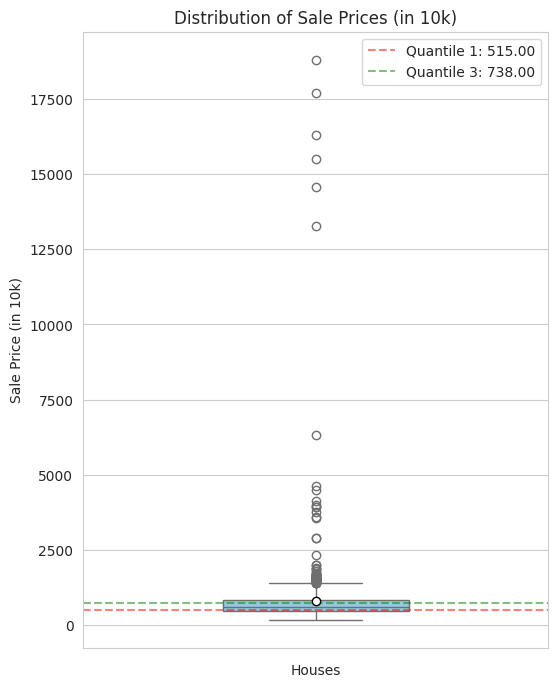

In [ ]:
df = property_hk_cleaned.copy()

low_thresh = df['SalePrice_10k'].quantile(0.33)
high_thresh = df['SalePrice_10k'].quantile(0.66)

plt.figure(figsize=(6, 8))
sns.set_style("whitegrid")
box_plot = sns.boxplot(y='SalePrice_10k', data=df, color='skyblue', width=0.4, showmeans=True, meanprops={'marker':'o', 'markerfacecolor':'white', 'markeredgecolor':'black'})
plt.title('Distribution of Sale Prices (in 10k)')
plt.ylabel('Sale Price (in 10k)')
plt.xlabel('Houses')
plt.axhline(low_thresh, color='red', linestyle='--', alpha=0.5, label=f'Quantile 1: {low_thresh:.2f}')
plt.axhline(high_thresh, color='green', linestyle='--', alpha=0.5, label=f'Quantile 3: {high_thresh:.2f}')
plt.legend()


In [ ]:
df['Price_Tier'] = np.select(
    [
        df['SalePrice_10k'] <= low_thresh,
        df['SalePrice_10k'] >= high_thresh
    ],
    [0, 2],
    default=1
).astype(int)

print("Low Price (0): below ", low_thresh, " (in 10k)")
print("Medium Price (1): from ", low_thresh, " to ", high_thresh, " (in 10k)")
print("High Price (2): above ", high_thresh, " (in 10k)")

print("\nDistribution:")
print(df['Price_Tier'].value_counts().sort_index())


Low Price (0): below  515.0  (in 10k)
Medium Price (1): from  515.0  to  738.0  (in 10k)
High Price (2): above  738.0  (in 10k)

Distribution:
Price_Tier
0    380
1    370
2    389
Name: count, dtype: int64


In [ ]:
X1 = np.concatenate([np.array(Days_to_reg_date).reshape(-1, 1), np.array(Bedroom).reshape(-1, 1),
                        np.array(Is_studio).reshape(-1, 1), np.array(SaleableArea).reshape(-1, 1),
                        np.array(GrossAreaPrice).reshape(-1, 1),
                        np.array(GrossArea).reshape(-1, 1),
                        np.array(SaleableAreaPrice).reshape(-1, 1),
                        np.array(pd.get_dummies(property_hk_cleaned[['Prop_Type', 'Roof']])),
                        np.array(property_hk_cleaned[['Floor', 'Build_Ages', 'Kindergarten', 'Primary_Schools', 'Secondary_Schools',
                                                     'Parks', 'Library', 'Bus_Route', 'Mall', 'Wet Market', 'Latitude', 'Longitude']].fillna(0))], axis=1)

y1 = df['Price_Tier'].values

# Train-test split (stratified to preserve tier ratios)
X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X1, y1,
    test_size=0.2,
    random_state=42,
    stratify=y1
)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

model = DecisionTreeClassifier(
    max_depth=5,
    class_weight='balanced',
    random_state=42
)
model.fit(X_train1, y_train1)

# Evaluate
y_pred1 = model.predict(X_test1)
print("Model Performance:")
print(classification_report(
    y_test1,
    y_pred1,
    target_names=['Low (0)', 'Medium (1)', 'High (2)']
))


Model Performance:
              precision    recall  f1-score   support

     Low (0)       0.91      0.88      0.89        76
  Medium (1)       0.83      0.91      0.86        74
    High (2)       0.97      0.91      0.94        78

    accuracy                           0.90       228
   macro avg       0.90      0.90      0.90       228
weighted avg       0.90      0.90      0.90       228



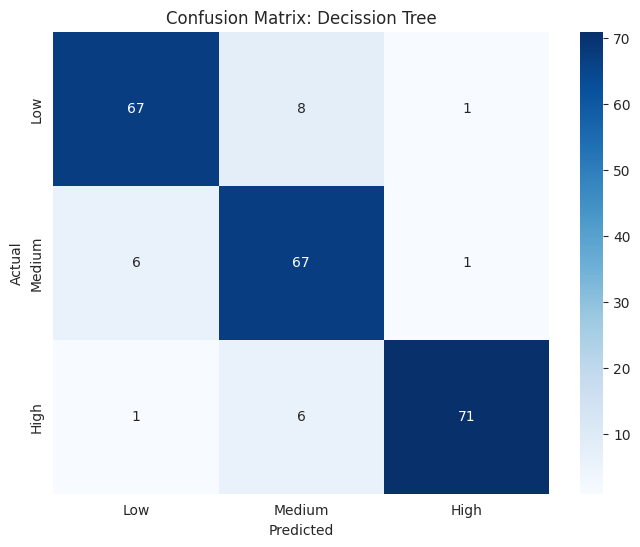

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test1, y_pred1)
plt.figure(figsize = (8, 6))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues', xticklabels = ['Low', 'Medium', 'High'], yticklabels = ['Low', 'Medium', 'High'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix: Decission Tree')
plt.show()

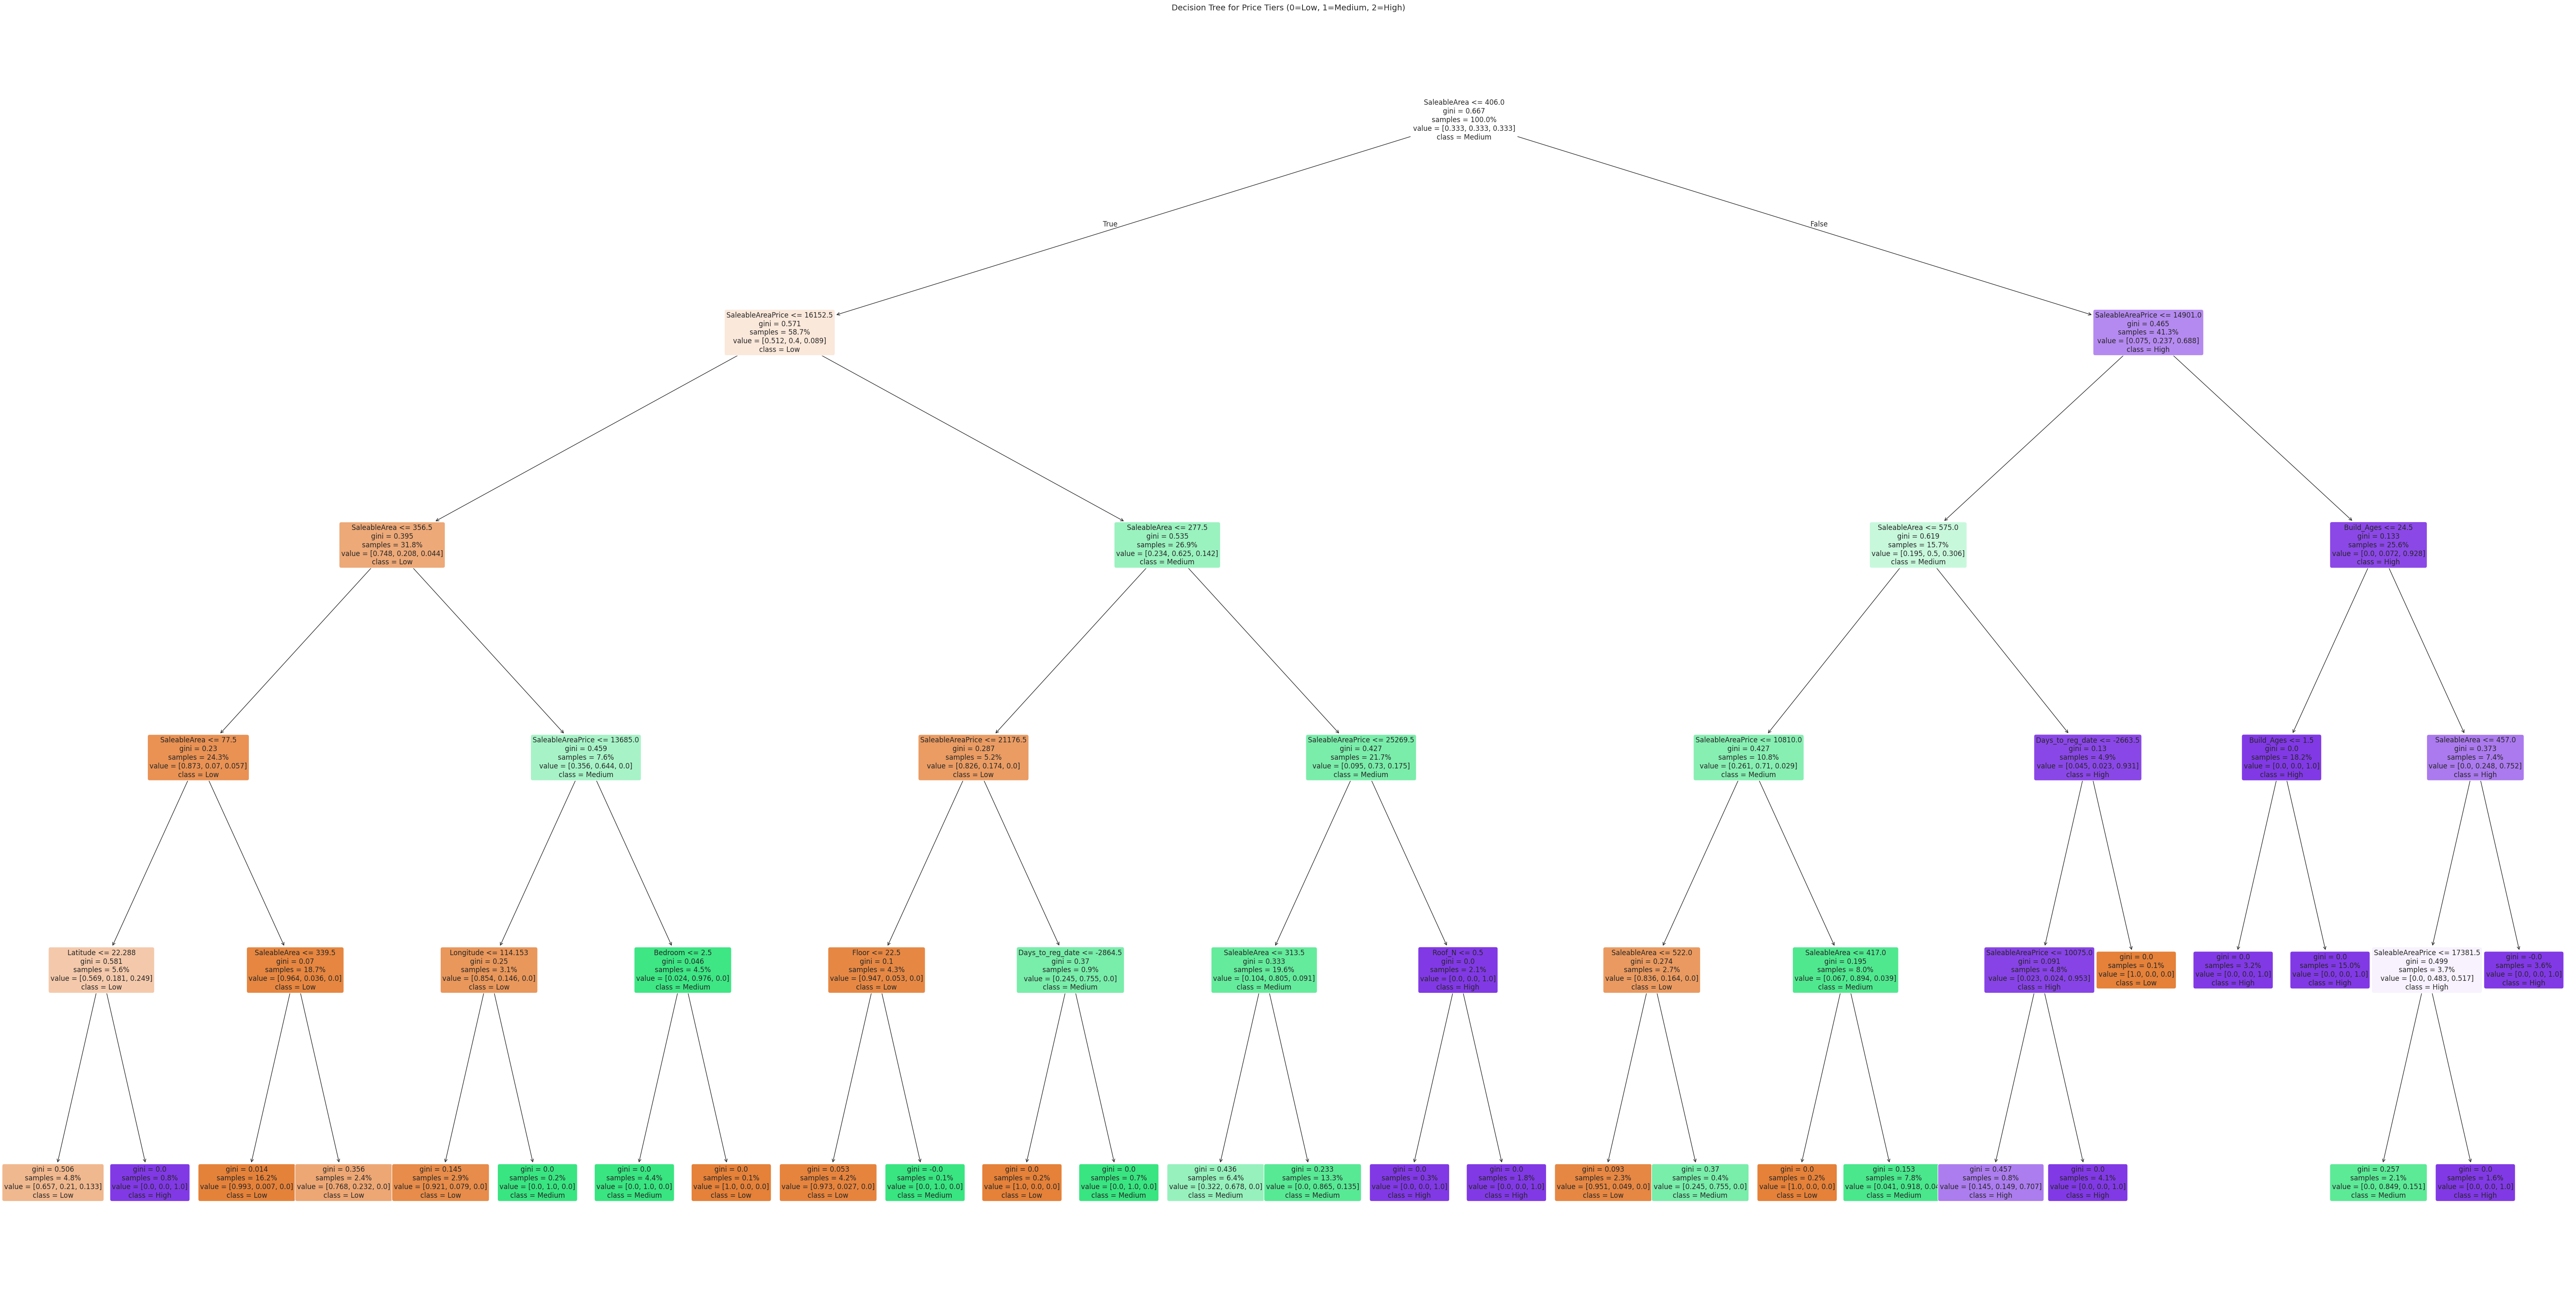

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(80, 40))
plot_tree(
    model,
    feature_names = ['Days_to_reg_date', 'Bedroom', 'Is_studio', 'SaleableArea', 'GrossAreaPrice', 'GrossArea', 'SaleableAreaPrice']
    + list(pd.get_dummies(property_hk_cleaned[['Prop_Type', 'Roof']]).columns)
    + ['Floor', 'Build_Ages', 'Kindergarten', 'Primary_Schools', 'Secondary_Schools', 'Parks', 'Library', 'Bus_Route', 'Mall', 'Wet Market', 'Latitude', 'Longitude'],
    class_names = ['Low', 'Medium', 'High'],
    filled=True,
    rounded=True,
    fontsize=12,
    proportion=True
)
plt.title("Decision Tree for Price Tiers (0=Low, 1=Medium, 2=High)", fontsize=14)
plt.show()

=== Decision Tree Classifier Performance ===

1. Classification Report:
              precision    recall  f1-score   support

     Low (0)       0.91      0.88      0.89        76
  Medium (1)       0.83      0.91      0.86        74
    High (2)       0.97      0.91      0.94        78

    accuracy                           0.90       228
   macro avg       0.90      0.90      0.90       228
weighted avg       0.90      0.90      0.90       228


2. Confusion Matrix:


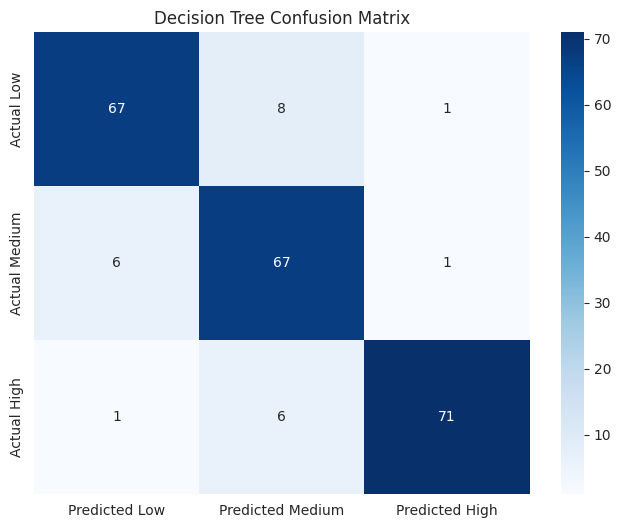


3. Top 5 Important Features:


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize and train model
model = DecisionTreeClassifier(
    max_depth=5,
    class_weight='balanced',
    random_state=42
)
model.fit(X_train1, y_train1)

# Generate predictions
y_pred1 = model.predict(X_test1)
y_proba1 = model.predict_proba(X_test1)  # For probability outputs

# Performance Evaluation
print("=== Decision Tree Classifier Performance ===")
print("\n1. Classification Report:")
print(classification_report(
    y_test1,
    y_pred1,
    target_names=['Low (0)', 'Medium (1)', 'High (2)']
))

# Confusion Matrix Visualization
print("\n2. Confusion Matrix:")
cm = confusion_matrix(y_test1, y_pred1)
cm_df = pd.DataFrame(cm,
                    index=['Actual Low', 'Actual Medium', 'Actual High'],
                    columns=['Predicted Low', 'Predicted Medium', 'Predicted High'])

plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Decision Tree Confusion Matrix')
plt.show()

# Feature Importance
print("\n3. Top 5 Important Features:")
importances = pd.DataFrame({
    'Feature': X_train1.columns,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False).head(5)

print(importances.to_markdown(index=False))